In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing the data
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
# Exploratory data analysis

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

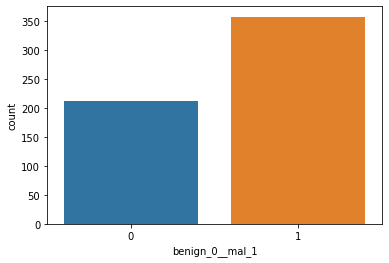

In [8]:
sns.countplot(x = 'benign_0__mal_1', data = df)

<AxesSubplot:>

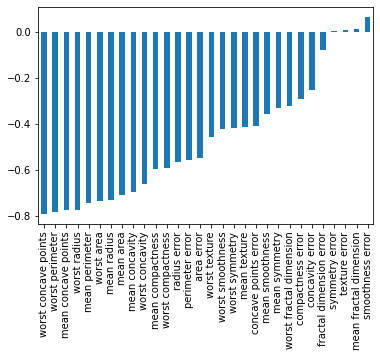

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<AxesSubplot:>

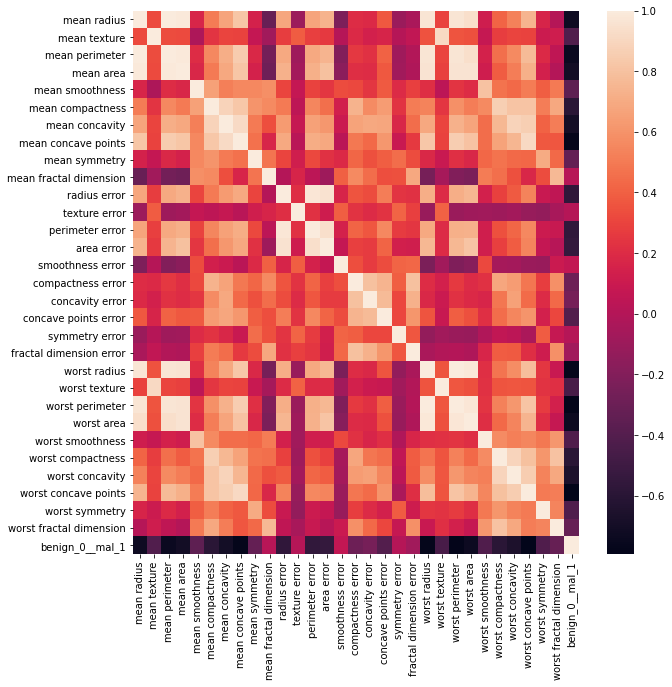

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [12]:
# Splitting the data

X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [13]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Training the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [21]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [22]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6691 - val_loss: 0.6399
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6374 - val_loss: 0.6081
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6045 - val_loss: 0.5727
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5604 - val_loss: 0.5320
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5252 - val_loss: 0.4871
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4678 - val_loss: 0.4317
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4402 - val_loss: 0.3807
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3697 - val_loss: 0.3345
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3509 - val_loss: 0.2996
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2988 - val_loss: 0.2668
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0623 - val_loss: 0.1182
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0632 - val_loss: 0.1163
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0495 - val_loss: 0.1187
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0483 - val_loss: 0.1237
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0671 - val_loss: 0.1181
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0741 - val_loss: 0.1162
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0589 - val_loss: 0.1330
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0480 - val_loss: 0.1199
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.1277
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0342 - val_loss: 0.1194
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.1451
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.1382
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0482 - val_loss: 0.1430
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0444 - val_loss: 0.1359
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.1461
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0462 - val_loss: 0.1399
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.1442
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0614 - val_loss: 0.1422
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0485 - val_loss: 0.1337
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0435 - val_loss: 0.1470
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0435 - val_loss: 0.1649
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0428 - val_loss: 0.1603
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.1585
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0404 - val_loss: 0.1602
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0537 - val_loss: 0.1707
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0296 - val_loss: 0.1570
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0363 - val_loss: 0.1523
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0659 - val_loss: 0.1706
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0356 - val_loss: 0.1573
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0327 - val_loss: 0.1731
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.1946
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0509 - val_loss: 0.1801
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.1777
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0461 - val_loss: 0.1768
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0467 - val_loss: 0.1792
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0378 - val_loss: 0.1775
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0554 - val_loss: 0.1728
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0356 - val_loss: 0.1810
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.1831
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0454 - val_loss: 0.1808
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0333 - val_loss: 0.1983
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0312 - val_loss: 0.1987
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0308 - val_loss: 0.1944
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0307 - val_loss: 0.1927
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0353 - val_loss: 0.2147
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0369 - val_loss: 0.1899
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0352 - val_loss: 0.2112
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0294 - val_loss: 0.2003
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.1928
Epoch 416/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0284 - val_loss: 0.2095
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0305 - val_loss: 0.2070
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0269 - val_loss: 0.2144
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.2209
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0407 - val_loss: 0.1959
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0467 - val_loss: 0.2175
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0280 - val_loss: 0.2141
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.2416
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0330 - val_loss: 0.1934
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0504 - val_loss: 0.2073
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0330 - val_loss: 0.2355
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0287 - val_loss: 0.2190
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.2303
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.2386
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.2287
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0226 - val_loss: 0.2440
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0199 - val_loss: 0.2229
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0368 - val_loss: 0.2305
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.2406
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0317 - val_loss: 0.2208
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0312 - val_loss: 0.2466
Epoc

<AxesSubplot:>

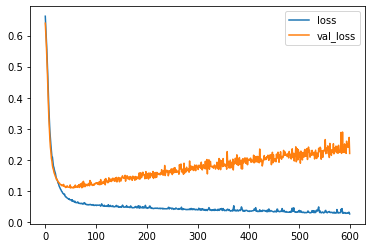

In [23]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [30]:
# This is an overfit - the training went over a large number of epochs

In [31]:
# Let's correct this

In [24]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [26]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test),callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7054 - val_loss: 0.6725
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6681 - val_loss: 0.6458
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6425 - val_loss: 0.6126
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6074 - val_loss: 0.5697
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5616 - val_loss: 0.5216
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5081 - val_loss: 0.4683
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4589 - val_loss: 0.4102
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4054 - val_loss: 0.3538
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3453 - val_loss: 0.3072
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3207 - val_loss: 0.2688
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0562 - val_loss: 0.1037
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0654 - val_loss: 0.1100
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0493 - val_loss: 0.1059
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0379 - val_loss: 0.1101
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 0.1102
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0413 - val_loss: 0.1216
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0521 - val_loss: 0.1105
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.1111
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0509 - val_loss: 0.1102
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0431 - val_loss: 0.1110
Epoch 93/600


<AxesSubplot:>

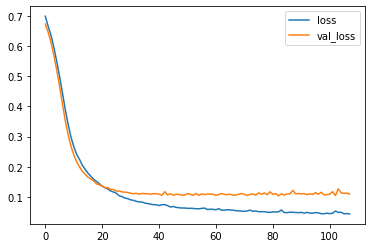

In [27]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [46]:
# Another option:

In [28]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [29]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7272 - val_loss: 0.6809
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6807 - val_loss: 0.6660
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6689 - val_loss: 0.6480
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6390 - val_loss: 0.6287
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6280 - val_loss: 0.6106
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6329 - val_loss: 0.5903
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6232 - val_loss: 0.5690
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5915 - val_loss: 0.5387
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5478 - val_loss: 0.5087
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5159 - val_loss: 0.4887
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1574 - val_loss: 0.1012
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1191 - val_loss: 0.1062
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1318 - val_loss: 0.0979
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1750 - val_loss: 0.1116
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1328 - val_loss: 0.0997
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1228 - val_loss: 0.0967
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1076 - val_loss: 0.0990
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1098 - val_loss: 0.1216
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1493 - val_loss: 0.1077
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1154 - val_loss: 0.0988
Epoch 93/600


<AxesSubplot:>

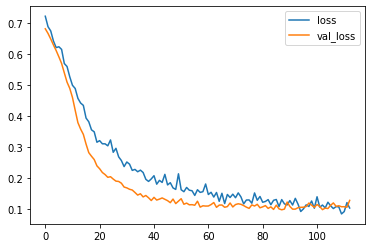

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [33]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [34]:
# Metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.99      0.93      0.96        88

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143

[[54  1]
 [ 6 82]]
